In [2]:
import Pkg
Pkg.add("Pkg")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")

  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\anime\.julia\environ

In [14]:
ENV["GRDIR"]=""; Pkg.build("GR")

   Building GR → `C:\Users\anime\.julia\packages\GR\yMV3y\deps\build.log`
┌ Error: Error building `GR`: 
│ ERROR: LoadError: ArgumentError: Package Pkg not found in current path:
│ - Run `import Pkg; Pkg.add("Pkg")` to install the Pkg package.
│ 
│ Stacktrace:
│  [1] require(::Module, ::Symbol) at .\loading.jl:893
│  [2] include(::Function, ::Module, ::String) at .\Base.jl:380
│  [3] include at .\Base.jl:368 [inlined]
│  [4] load_julia_startup() at .\client.jl:324
│  [5] exec_options(::Base.JLOptions) at .\client.jl:267
│  [6] _start() at .\client.jl:506
│ in expression starting at C:\Users\anime\AppData\Local\JuliaPro-1.5.1-1\Julia-1.5.1\etc\julia\startup.jl:5
└ @ Pkg.Operations D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Operations.jl:949


In [2]:
import Pkg;
Pkg.add("Pkg")
Pkg.add("GR")
Pkg.build("GR")


  Resolving package versions...
 Installing known registries into `C:\Users\anime\.julia`
      Added registry `General` to `C:\Users\anime\.julia\registries\General`
      Added registry `JuliaComputingRegistry` to `C:\Users\anime\.julia\registries\JuliaComputingRegistry`
      Added registry `JuliaPro` to `C:\Users\anime\.julia\registries\JuliaPro`
No Changes to `C:\Users\anime\.julia\environments\JuliaPro_v1.5.1-1\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\JuliaPro_v1.5.1-1\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\anime\.julia\environments\JuliaPro_v1.5.1-1\Project.toml`
No Changes to `C:\Users\anime\.julia\environments\JuliaPro_v1.5.1-1\Manifest.toml`
   Building GR → `C:\Users\anime\.julia\packages\GR\yMV3y\deps\build.log`
┌ Error: Error building `GR`: 
│ ERROR: LoadError: ArgumentError: Package Pkg not found in current path:
│ - Run `import Pkg; Pkg.add("Pkg")` to install the Pkg package.
│ 
│ Stacktrace:
│  [1] require(::Module,

In [49]:
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots
using Dates
using Random

In [3]:
ems_2018 = CSV.read("data/EMS_2018.csv")

LoadError: ArgumentError: column name :head not found in the data frame

In [4]:
head(ems_2018)

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE
,Int64,String,String,Int64
1,180024020,01/02/2018 08:37:19 PM,OTHER,6
2,180010018,01/01/2018 12:05:43 AM,SICMIN,7
3,180010001,01/01/2018 12:00:47 AM,TRAUMA,2
4,180010002,01/01/2018 12:00:50 AM,SICK,6
5,180010003,01/01/2018 12:00:52 AM,INJURY,5
6,180010004,01/01/2018 12:00:58 AM,UNC,2


In [50]:
feature_names = names(ems_2018)
for i in 1:31
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(ems_2018[!, i])))
end

LoadError: UndefVarError: ems_2018 not defined

In [10]:
# interesting to look at initial vs final severity
# initial call type vs final call type (any outliers?)
# Activation/dispatch Response times
# histogram of incidents by date/time, borough/zipcode, policeprecinct, districts
# could try joining income with district/schooldistrict
# what is held_indicator, incident_disposition_code, reopen indicator, special event indicator, standby or transfer indicator?

In [51]:
#split into months to run more quickly
ems_jan2020 = CSV.read("EMS_2020_1.csv")
head(ems_jan2020)

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE
,Int64,String,String,Int64
1,200010444,01/01/2020 01:16:49 AM,INJURY,5
2,200010001,01/01/2020 12:00:20 AM,UNKNOW,4
3,200010002,01/01/2020 12:00:38 AM,STATEP,2
4,200010003,01/01/2020 12:00:50 AM,UNKNOW,4
5,200010004,01/01/2020 12:01:30 AM,INJMAJ,3
6,200010005,01/01/2020 12:01:44 AM,ABDPN,5


In [52]:
feature_names = names(ems_jan2020)
for i in 1:31
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(ems_jan2020[!, i])))
end

1	CAD_INCIDENT_ID			Int64
2	INCIDENT_DATETIME			String
3	INITIAL_CALL_TYPE			String
4	INITIAL_SEVERITY_LEVEL_CODE			Int64
5	FINAL_CALL_TYPE			String
6	FINAL_SEVERITY_LEVEL_CODE			Int64
7	FIRST_ASSIGNMENT_DATETIME			String
8	VALID_DISPATCH_RSPNS_TIME_INDC			String
9	DISPATCH_RESPONSE_SECONDS_QY			String
10	FIRST_ACTIVATION_DATETIME			String
11	FIRST_ON_SCENE_DATETIME			String
12	VALID_INCIDENT_RSPNS_TIME_INDC			String
13	INCIDENT_RESPONSE_SECONDS_QY			String
14	INCIDENT_TRAVEL_TM_SECONDS_QY			String
15	FIRST_TO_HOSP_DATETIME			String
16	FIRST_HOSP_ARRIVAL_DATETIME			String
17	INCIDENT_CLOSE_DATETIME			String
18	HELD_INDICATOR			String
19	INCIDENT_DISPOSITION_CODE			Float64
20	BOROUGH			String
21	INCIDENT_DISPATCH_AREA			String
22	ZIPCODE			Float64
23	POLICEPRECINCT			Float64
24	CITYCOUNCILDISTRICT			Float64
25	COMMUNITYDISTRICT			Float64
26	COMMUNITYSCHOOLDISTRICT			Float64
27	CONGRESSIONALDISTRICT			Float64
28	REOPEN_INDICATOR			String
29	SPECIAL_EVENT_INDICATOR			String
30	STANDBY_IND

In [53]:
ems_jan2020 = ems_jan2020[ems_jan2020[:VALID_DISPATCH_RSPNS_TIME_INDC] .== "Y", :]
ems_jan2020 = ems_jan2020[ems_jan2020[:VALID_INCIDENT_RSPNS_TIME_INDC] .== "Y", :]

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE
,Int64,String,String,Int64
1,200010444,01/01/2020 01:16:49 AM,INJURY,5
2,200010001,01/01/2020 12:00:20 AM,UNKNOW,4
3,200010002,01/01/2020 12:00:38 AM,STATEP,2
4,200010003,01/01/2020 12:00:50 AM,UNKNOW,4
5,200010004,01/01/2020 12:01:30 AM,INJMAJ,3
6,200010005,01/01/2020 12:01:44 AM,ABDPN,5
7,200010006,01/01/2020 12:01:55 AM,UNC,2
8,200010007,01/01/2020 12:02:09 AM,CARD,3
9,200010009,01/01/2020 12:02:32 AM,INJURY,5


In [54]:
sum(ismissing(ems_jan2020[:FIRST_HOSP_ARRIVAL_DATETIME])) #Doesn't recognize missing vals yet?

0

In [20]:
#count missing for each row
#histogram 
"""
INCIDENT_RESPONSE_SECONDS_QY			String
14	INCIDENT_TRAVEL_TM_SECONDS_QY			String
16	FIRST_HOSP_ARRIVAL_DATETIME			String
19	INCIDENT_DISPOSITION_CODE			Float64
Try it as output, if drags accuracy down too much then leave out 
Maybe can use for training? But dont require as input for predictions """

"""transporting patient
patient pronounced dead
cancelled
unfounded
condition corrected
treated not transported
refused medical aid
treated and transported
triaged at scene no transport
patient gone on arrival
cancelled
duplicate incident - Probably want to filter this?
unit not sent
no disposition
"""
@df ems_jan2020 corrplot([:INCIDENT_RESPONSE_SECONDS_QY, :INCIDENT_TRAVEL_TM_SECONDS_QY, :FIRST_HOSP_ARRIVAL_DATETIME, :FINAL_CALL_TYPE])

##259

In [16]:
?corrplot

search: corrplot corrplot! cornerplot cornerplot!



transporting patient patient pronounced dead cancelled unfounded condition corrected treated not transported refused medical aid treated and transported triaged at scene no transport patient gone on arrival cancelled duplicate incident - Probably want to filter this? unit not sent no disposition

---

```
corrplot
```

This plot type shows the correlation among input variables.   A correlation plot may be produced by a matrix.

A correlation matrix can also be created from the columns of a `DataFrame` using the [`@df`](@ref) macro like so:

```julia
@df iris corrplot([:SepalLength :SepalWidth :PetalLength :PetalWidth])
```

The marker color in scatter plots reveals the degree of correlation.  Pass the desired colorgradient to `markercolor`.

With the default gradient positive correlations are blue, neutral are yellow  and negative are red. In the 2d-histograms, the color gradient shows the frequency  of points in that bin (as usual, controlled by `seriescolor`).


In [17]:
?heatmap

search: heatmap heatmap! plots_heatmap plots_heatmap!



```
heatmap(x,y,z)
heatmap!(x,y,z)
```

Plot a heatmap of the rectangular array `z`.

# Example

```julia-repl
julia> heatmap(randn(10,10))
```


In [22]:
#heatmap(randn(10,10)) use if inputs are same values in similar range
#x, y , z. x is the categories for the x axis, y is categories on y axis, z is the value/heat at each pair x,y

In [55]:
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end
ems_jan2020[:INCIDENT_RESPONSE_SECONDS_QY] = string_to_float.(ems_jan2020[:, :INCIDENT_RESPONSE_SECONDS_QY])

128597-element Array{Float64,1}:
   0.0
 227.0
 403.0
 509.0
 628.0
   0.0
 216.0
 422.0
 577.0
 459.0
   0.0
 456.0
 126.0
   ⋮
   0.0
 964.0
   0.0
   0.0
 384.0
 278.0
 273.0
 474.0
 651.0
 624.0
   0.0
 340.0

In [64]:
ems_jan2020[:INCIDENT_TRAVEL_TM_SECONDS_QY] = string_to_float.(ems_jan2020[:, :INCIDENT_TRAVEL_TM_SECONDS_QY])

128597-element Array{Float64,1}:
 503.0
 135.0
 367.0
 470.0
 624.0
 803.0
 208.0
 392.0
 542.0
 450.0
   0.0
 447.0
 115.0
   ⋮
 933.0
 947.0
   0.0
   0.0
 343.0
 264.0
 174.0
 467.0
 630.0
 548.0
   0.0
 295.0

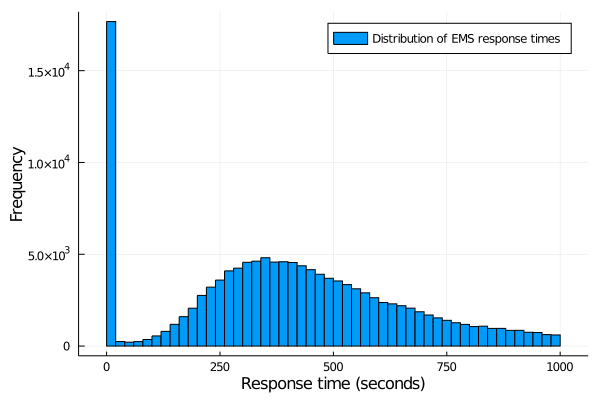

In [56]:
histogram(ems_jan2020[:INCIDENT_RESPONSE_SECONDS_QY], label="Distribution of EMS response times")
xlabel!("Response time (seconds)")
ylabel!("Frequency")

In [57]:
"""The mean squared error of the true value y and prediction pred."""
function MSE(y, pred)
    mse = sqrt(sum((y - pred).^2)/length(y))
    return mse
end

MSE

In [58]:
#groupby zipcode to compute avg/variance in response time.
avg_rspns_time_zip = by(ems_jan2020, :ZIPCODE, :INCIDENT_RESPONSE_SECONDS_QY => mean)
var_rspns_time_zip = by(ems_jan2020, :ZIPCODE, :INCIDENT_RESPONSE_SECONDS_QY => var)

,ZIPCODE,INCIDENT_RESPONSE_SECONDS_QY_var
,Float64,Float64
1,10457.0,72296.2
2,10004.0,44978.3
3,11216.0,60384.9
4,11429.0,31570.2
5,11212.0,58683.8
6,10035.0,91963.3
7,10065.0,59539.6
8,10001.0,50619.9
9,10460.0,79743.8


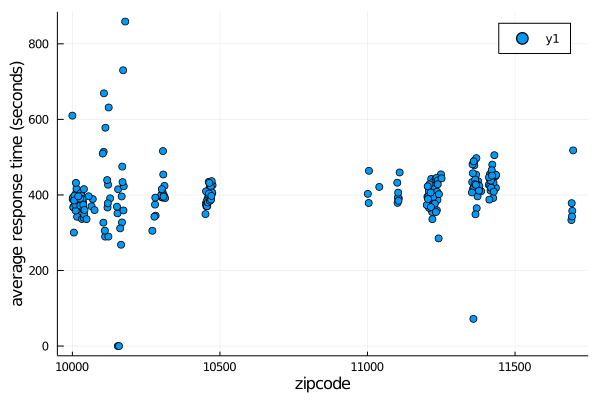

In [59]:
@df avg_rspns_time_zip scatter(:ZIPCODE, :INCIDENT_RESPONSE_SECONDS_QY_mean)
xlabel!("zipcode")
ylabel!("average response time (seconds)")

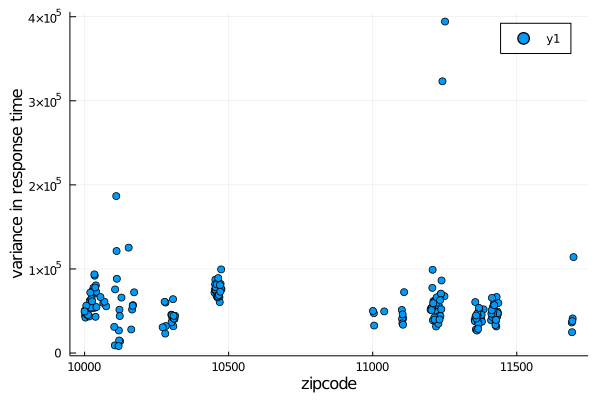

In [60]:
@df var_rspns_time_zip scatter(:ZIPCODE, :INCIDENT_RESPONSE_SECONDS_QY_var)
xlabel!("zipcode")
ylabel!("variance in response time")

In [ ]:
@df avg_rspns_time_zip scatter(:ZIPCODE, :INCIDENT_RESPONSE_SECONDS_QY_mean) #Want to calculate mean for each day

In [ ]:
#preprocessing - replace INCIDENT_DATETIME with month, year, time of day
ems_jan2020[:INCIDENT_DATETIME] = map(x -> DateTime(x[:INCIDENT_DATETIME], "m/d/y I:M:S p"), eachrow(ems_jan2020))

In [47]:
ymh = [Dates.year.(ems_jan2020[:INCIDENT_DATETIME]) Dates.month.(ems_jan2020[:INCIDENT_DATETIME]) Dates.hour.(ems_jan2020[:INCIDENT_DATETIME])] 

128597×3 Array{Int64,2}:
 2020  1   1
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
 2020  1   0
    ⋮     
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23
 2020  1  23

In [61]:
jan2020timeresp = [ems_jan2020[:INCIDENT_RESPONSE_SECONDS_QY] ems_jan2020[:ZIPCODE] ymh]

128597×5 Array{Float64,2}:
   0.0  10457.0  2020.0  1.0   1.0
 227.0  10004.0  2020.0  1.0   0.0
 403.0  11216.0  2020.0  1.0   0.0
 509.0  11429.0  2020.0  1.0   0.0
 628.0  11212.0  2020.0  1.0   0.0
   0.0  10035.0  2020.0  1.0   0.0
 216.0  10065.0  2020.0  1.0   0.0
 422.0  10001.0  2020.0  1.0   0.0
 577.0  10460.0  2020.0  1.0   0.0
 459.0  11411.0  2020.0  1.0   0.0
   0.0  10451.0  2020.0  1.0   0.0
 456.0  11433.0  2020.0  1.0   0.0
 126.0  11694.0  2020.0  1.0   0.0
   ⋮                          
   0.0  10035.0  2020.0  1.0  23.0
 964.0  11211.0  2020.0  1.0  23.0
   0.0  10468.0  2020.0  1.0  23.0
   0.0  11237.0  2020.0  1.0  23.0
 384.0  10035.0  2020.0  1.0  23.0
 278.0  11435.0  2020.0  1.0  23.0
 273.0  10451.0  2020.0  1.0  23.0
 474.0  10036.0  2020.0  1.0  23.0
 651.0  11103.0  2020.0  1.0  23.0
 624.0  10025.0  2020.0  1.0  23.0
   0.0  10473.0  2020.0  1.0  23.0
 340.0  11428.0  2020.0  1.0  23.0

In [ ]:
#groupby time, then groupby zipcode. Then take the mean/variance of that
by(ems_jan2020, :ZIPCODE, :INCIDENT_RESPONSE_SECONDS_QY => var)
by(ems_jan2020, :ZIPCODE, by(ems_jan2020, :HOUR, :INCIDENT_RESPONSE_SECONDS_QY => mean))

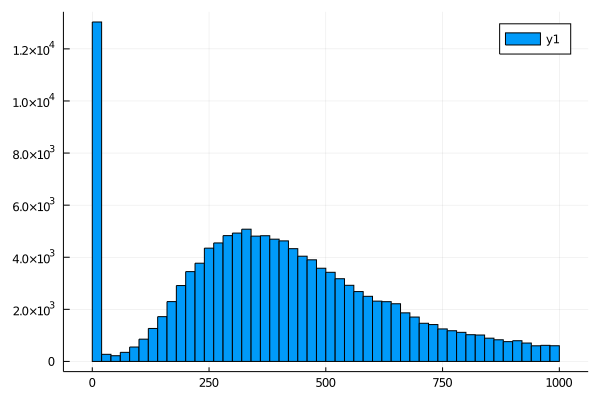

In [65]:
histogram(ems_jan2020[:INCIDENT_TRAVEL_TM_SECONDS_QY])

In [66]:
#groupby zipcode to compute avg/variance in response time.
avg_trvl_time_zip = by(ems_jan2020, :ZIPCODE, :INCIDENT_TRAVEL_TM_SECONDS_QY => mean)
var_trvl_time_zip = by(ems_jan2020, :ZIPCODE, :INCIDENT_TRAVEL_TM_SECONDS_QY => var)

,ZIPCODE,INCIDENT_TRAVEL_TM_SECONDS_QY_var
,Float64,Float64
1,10457.0,63658.5
2,10004.0,39502.3
3,11216.0,55524.2
4,11429.0,31101.2
5,11212.0,55445.2
6,10035.0,81413.6
7,10065.0,50763.5
8,10001.0,44897.8
9,10460.0,68395.4


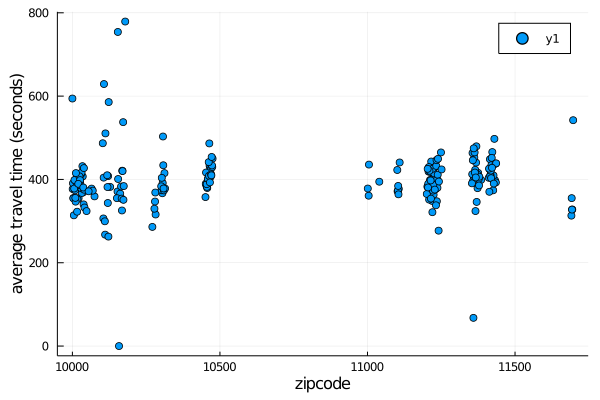

In [67]:
@df avg_trvl_time_zip scatter(:ZIPCODE, :INCIDENT_TRAVEL_TM_SECONDS_QY_mean)
xlabel!("zipcode")
ylabel!("average travel time (seconds)")

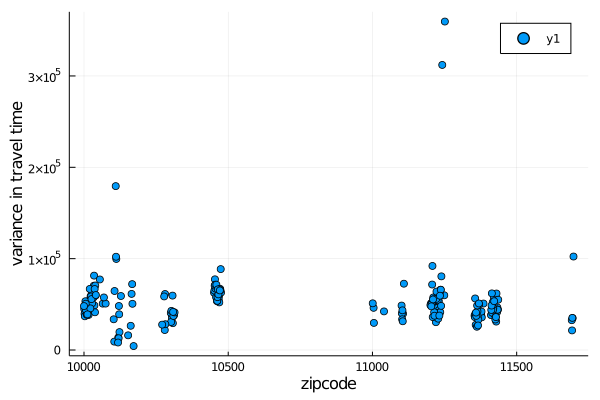

In [68]:
@df var_trvl_time_zip scatter(:ZIPCODE, :INCIDENT_TRAVEL_TM_SECONDS_QY_var)
xlabel!("zipcode")
ylabel!("variance in travel time")

In [70]:
ems_2019 = CSV.read("EMS_2019_subsampled.csv")
head(ems_2019)

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE
,Int64,String,String,Int64
1,190010606,01/01/2019 02:09:21 AM,INJURY,5
2,190010876,01/01/2019 03:01:29 AM,INJURY,5
3,190010918,01/01/2019 03:10:39 AM,DRUG,4
4,190011032,01/01/2019 03:40:36 AM,INJURY,5
5,190011327,01/01/2019 04:49:42 AM,INJURY,5
6,190011328,01/01/2019 04:49:54 AM,MVAINJ,4


In [ ]:
#FIRST_HOSP_ARRIVAL_DATETIME

In [ ]:
#use incident disposition code for multiclass classification?
#predict number of incidences in a time period (maybe also pred which hospitals) to help hospitals manage resources

In [ ]:
#random forest algorithm, KNN because data doesnt look linear

In [ ]:
#in excel data->filter->column
#summarystats